In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [ ]:
pd.set_option("display.max_rows", 25)

In [ ]:
!wget -nc https://archive.ics.uci.edu/static/public/911/recipe+reviews+and+user+feedback+dataset.zip
!unzip -n recipe+reviews+and+user+feedback+dataset.zip

--2024-11-01 01:39:14--  https://archive.ics.uci.edu/static/public/911/recipe+reviews+and+user+feedback+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘recipe+reviews+and+user+feedback+dataset.zip’

recipe+reviews+and+     [   <=>              ]   2.02M  4.41MB/s    in 0.5s    

2024-11-01 01:39:14 (4.41 MB/s) - ‘recipe+reviews+and+user+feedback+dataset.zip’ saved [2114088]

Archive:  recipe+reviews+and+user+feedback+dataset.zip
  inflating: Recipe Reviews and User Feedback Dataset.csv  


In [ ]:
recipes = pd.read_csv('/content/Recipe Reviews and User Feedback Dataset.csv')

## Feature Information

(Feature information taken directly from the UCI Machine Learning Repository page for Recipe Reviews and User Feedback page: https://archive.ics.uci.edu/dataset/911/recipe+reviews+and+user+feedback+dataset)
1. recipe name: {name of the recipe the comment was posted on}
2. recipe number: {placement of the recipe on the top 100 recipes list}
3. recipe code: {unique id of the recipe used by the site}
4. comment id: {unique id of the comment}
5. user id: {unique id of the user who left the comment}
6. user name: {name of the user}
7. user reputation: {internal score of the site, roughly quantifying the past behavior of the user}
8. create at: {time at which the comment was posted as a Unix timestamp}
9. reply count: {number of replies to the comment}
10. thumbs up: {number of up-votes the comment has received}
11. thumbs down: {number of down-votes the comment has received}
12. stars: {the score on a 1 to 5 scale that the user gave to the recipe. A score of 0 means that no score was given}
13. best score: {score of the comment, likely used by the site the help determine the order in the comments that appear in}
14. text: {the text content of the comment}

In [ ]:
print(f'Number of observations: {recipes.shape[0]}')
print(f'Number of features: {recipes.shape[1]}')

Number of observations: 18182
Number of features: 15


In [ ]:
recipes.describe()

,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.000000,18182.000000,18182.000000,18182.000000,1.818200e+04,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,121.465295,38.689363,21773.667253,2.159608,1.623710e+09,0.014630,1.089264,0.549335,4.288802,153.162138
std,116.747893,29.786647,23965.109637,10.014666,5.468697e+06,0.137974,4.201004,3.470124,1.544786,141.075316
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,150.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000


In [ ]:
nan_counts = recipes.isnull().sum()

print(nan_counts)

Unnamed: 0         0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               2
dtype: int64


In [ ]:
recipes.head(5)

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [ ]:
recipes.iloc[0]['text']

'I tweaked it a little, removed onions because of onion haters in my house, used Italian seasoning instead of just oregano, and use a paprika/ cayenne mix and a little more than the recipe called for.. we like everything a bit more hot. The chili was amazing! It was easy to make and everyone absolutely loved it. It will now be a staple meal in our house.'

## Exploring a single user

In [ ]:
user_freq = recipes['user_id'].value_counts()
user_freq

,count
user_id,
u_1oKVZzipo1u8lcqQzDUcw4UBn9e,25
u_1oKVZmYPulmUFbvGiBA8U3uRR6D,23
u_1oKVZoIOMWJ2j7TA7py2BIbf1mm,23
u_1oKVZdmUbQTYMVdbXOpVfRQuHm9,23
u_1oKVeN9YNf07RT0P9R63Yu80P5A,23
...,...
u_1oKVeDE5LgvPWNlhcHCrJ4BSb2a,1
u_1oKZwWXHUaGO1Ns9K82Qd96ohyP,1
u_1oKZRcnZKbFYH2HQ250TgDq36rV,1


In [ ]:
recipes['user_id'].value_counts().describe()
# vast majority of users have left only one comment

,count
count,13812.000000
mean,1.316392
std,1.176895
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,25.000000


In [ ]:
user = 'u_1oKVZoIOMWJ2j7TA7py2BIbf1mm'
user_comments = recipes[recipes['user_id'] == user]
display(user_comments.shape)
display(user_comments.head(4))

(23, 15)

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
198,198,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_274376,u_1oKVZoIOMWJ2j7TA7py2BIbf1mm,mjlouk,1,1622717685,0,0,0,5,100,So good! My husband and I really liked it! B...
1591,428,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_129814,u_1oKVZoIOMWJ2j7TA7py2BIbf1mm,mjlouk,1,1622716984,0,0,0,4,100,DH and I liked it but my kids wouldn&#39;t eve...
2004,116,4,17826,Amish Breakfast Casserole,sp_aUSaElGf_17826_c_338332,u_1oKVZoIOMWJ2j7TA7py2BIbf1mm,mjlouk,1,1622717987,0,1,0,5,193,This was great! I used ricotta instead of cot...
2377,151,5,42386,Pumpkin Spice Cupcakes with Cream Cheese Frosting,sp_aUSaElGf_42386_c_340730,u_1oKVZoIOMWJ2j7TA7py2BIbf1mm,mjlouk,1,1622718015,0,0,0,4,100,"This was really good, even though I cheated an..."


In [ ]:
user_comments.describe()

,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,23.000000,23.000000,23.000000,23.0,2.300000e+01,23.000000,23.000000,23.000000,23.000000,23.000000
mean,100.217391,46.956522,29133.869565,1.0,1.622715e+09,0.043478,0.347826,0.043478,4.521739,129.478261
std,84.553349,30.805074,41570.062587,0.0,1.434069e+04,0.208514,0.647281,0.208514,0.665348,52.840988
min,20.000000,1.000000,414.000000,1.0,1.622649e+09,0.000000,0.000000,0.000000,3.000000,100.000000
25%,56.000000,22.000000,7106.000000,1.0,1.622717e+09,0.000000,0.000000,0.000000,4.000000,100.000000
50%,74.000000,50.000000,17826.000000,1.0,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,110.500000,69.500000,35223.500000,1.0,1.622718e+09,0.000000,0.500000,0.000000,5.000000,146.500000
max,428.000000,99.000000,191775.000000,1.0,1.622718e+09,1.000000,2.000000,1.000000,5.000000,253.000000


<Axes: >

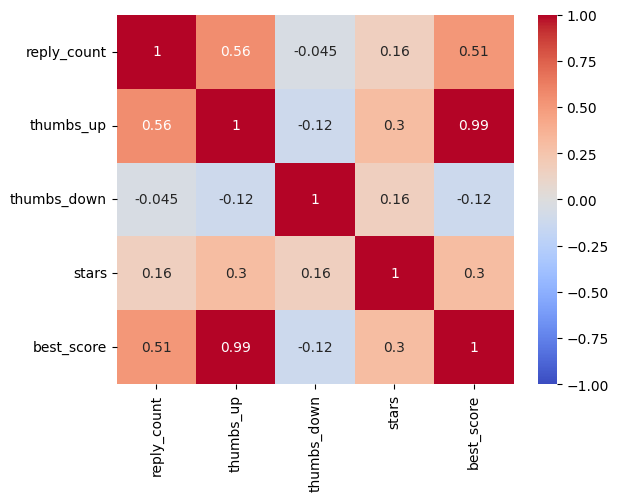

In [ ]:
user_comments1 = user_comments[['reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score']]
sns.heatmap(user_comments1.corr(), annot = True, vmin=-1, vmax=1, center= 0,cmap='coolwarm')

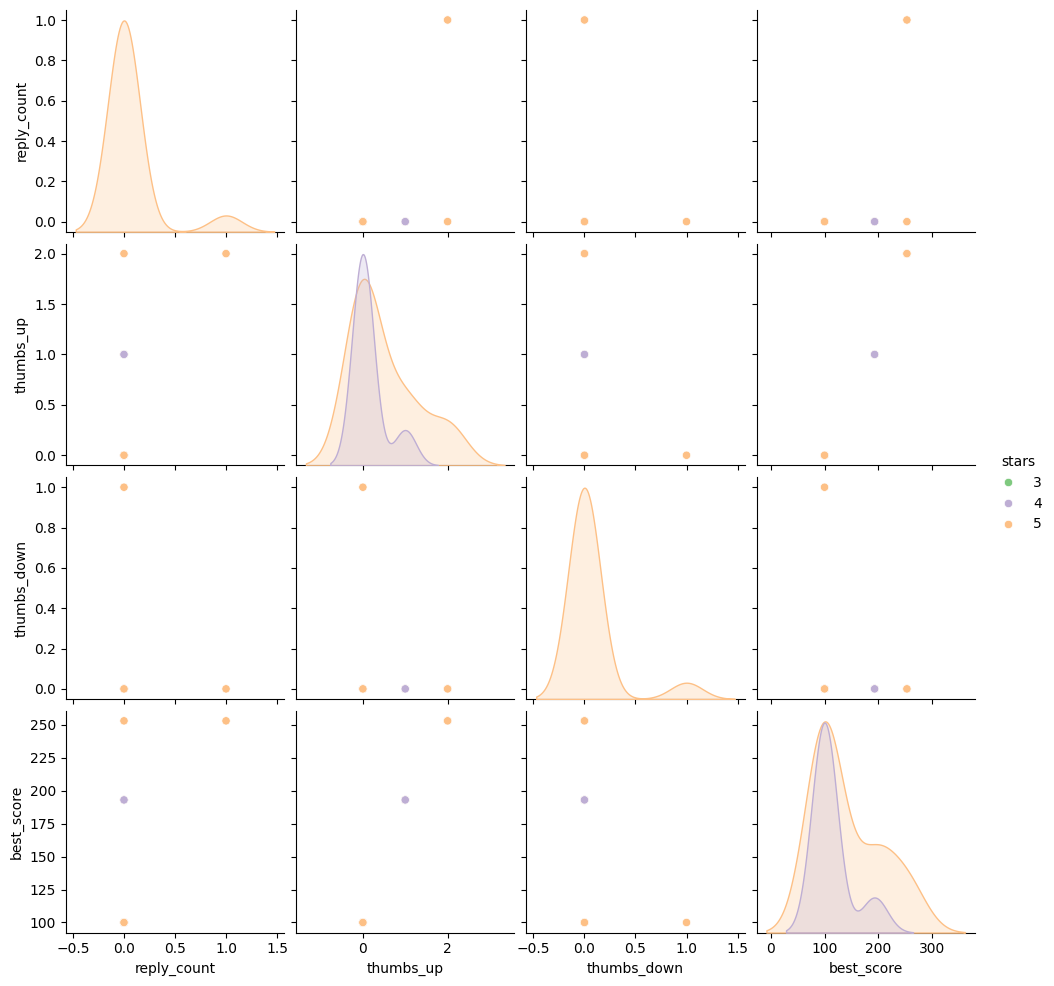

In [ ]:
sns.pairplot(user_comments1, hue='stars', palette='Accent')

# Exploring a single recipe

In [ ]:
recipes['recipe_code'].value_counts()

,count
recipe_code,
2832,725
14299,654
3309,509
42083,421
32480,397
...,...
27675,96
1821,90
3683,86


As the recipe_code is the unique identifier for a given recipe in the dataset, we can use value_counts() in order to explore how often recipes were reviewed by individuals in this dataset. The counts highlight that the minimum number of reviews received was 31 with the maximum being 725.

In [ ]:
recipes['recipe_code'].value_counts().describe()

,count
count,100.000000
mean,181.820000
std,106.803641
min,31.000000
25%,128.000000
50%,149.000000
75%,191.750000
max,725.000000


Furthermore, we look at the summary statistics to highlight the typical number of reviews that a recipe would receive within this dataset. Utilizing the mean and standard deviation, we can see that 50% of the reviews in this dataset received between 75 and 287 reviews.

In [ ]:
r_code = 3309 #r_code for "Best Ever Banana Bread"
chosen_recipe_reviews = recipes[recipes['recipe_code'] == r_code]
display(chosen_recipe_reviews.shape)
display(chosen_recipe_reviews.head(10))

(509, 15)

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
654,0,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_2FolwA0WHirT2q7DDTqyFJ0GvGR,u_fjZn9UjnYY9Y,ritajandj,1,1665166553,0,0,0,5,510,This is the best recipe for banana bread I&#39...
655,1,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_2Ep40E2YQon3AZ6OBn6AzjlOUgc,u_qW2rjMVr5SYl,mrscessna,50,1663278966,0,0,0,4,488,sweet and moist! I will be making this again
656,2,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_2CWVCrfxczs1PGguLbIdM8r88A3,u_iWjGINSSoqyU,danielleylee,10,1658918203,0,8,0,5,825,I made this bread with one minor twist. I live...
657,3,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_2CBnWlxTIM2CGJ64QmWioAeAAop,u_j6XdnbRT1vtZ,Joan9859,70,1658284879,0,6,1,5,750,"In place of the 1/2 cup of oil, I used another..."
658,4,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_29vulYmOzERr8m6p1G9qbK3viNC,u_f2qPJ3428ktq,dcscake_OH,20,1654006031,0,4,0,5,759,"Made this for my book club, but used sour crea..."
659,5,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_29XwzUPWVbOp8GBLSXh5bEUAiNc,u_RKjgrUNMQ2nL,Jody939,1,1653273000,0,6,1,5,759,This recipe has an amazing flavor. I did chan...
660,6,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_28oSUFIyMS5O0XCRvOoxBcHs1IY,u_3sizCBCgDxYv,inotsmile,1,1651881458,0,12,3,5,763,I have made this recipe several times. My fam...
661,7,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_28E25mUNpj5EtSosg5szn9jn8Av,u_lWOi5Uvd2Crc,KristineChayes576,50,1650767243,0,3,0,5,710,Best Ever Banana Bread is a great recipe! No a...
662,8,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_26sxNJFIsm6NTGmS8herPP3EqUT,u_XzUnohKrX5xj,jkhafer@yahoo.com,1,1648498961,0,11,1,5,804,Add 1 tsp cinnamon to dry ingredients and it m...
663,9,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_25fGq9WwhfmiXO7A3hmzhBCVBsT,u_nWwqfttBORnl,Raynebow68,1,1645910916,0,5,1,5,728,Best banana bread ever. Used pecans instead of...


To explore what a given recipe looks like, we selected the recipe associated with recipe_code 3309. This is the "Best Ever Banana Bread" recipe which has 509 reviews left on it. We can utilize this recipe as an example of the information we can extract from a single recipe and the individuals who interacted with it.

In [ ]:
chosen_recipe_reviews.value_counts('stars',sort=False)

,count
stars,
0,24
1,7
2,7
3,8
4,25
5,438


Here we can see the distribution of ratings applied by users to this recipe. Before looking at the descriptive statistics, it is clear that users tend to rate this recipe 5/5 stars.

In [ ]:
chosen_recipe_reviews['stars'].describe()

,stars
count,509.000000
mean,4.587426
std,1.211298
min,0.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


<Axes: xlabel='stars', ylabel='count'>

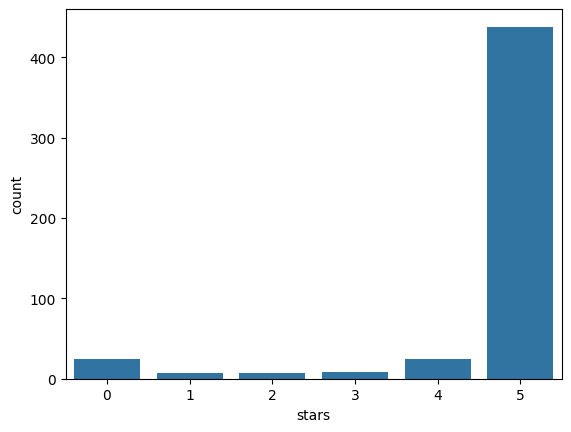

In [ ]:
sns.countplot(data=chosen_recipe_reviews, x='stars')

In [ ]:
len_text = []

for index,row in chosen_recipe_reviews.iterrows():
  len_text.append(len(row['text']))

chosen_recipe_reviews['text_len'] = len_text

<ipython-input-55-8529c5bb86a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_recipe_reviews['text_len'] = len_text


In [ ]:
chosen_recipe_reviews

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,text_len
654,0,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_2FolwA0WHirT2q7DDTqyFJ0GvGR,u_fjZn9UjnYY9Y,ritajandj,1,1665166553,0,0,0,5,510,This is the best recipe for banana bread I&#39...,381
655,1,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_2Ep40E2YQon3AZ6OBn6AzjlOUgc,u_qW2rjMVr5SYl,mrscessna,50,1663278966,0,0,0,4,488,sweet and moist! I will be making this again,45
656,2,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_2CWVCrfxczs1PGguLbIdM8r88A3,u_iWjGINSSoqyU,danielleylee,10,1658918203,0,8,0,5,825,I made this bread with one minor twist. I live...,554
657,3,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_2CBnWlxTIM2CGJ64QmWioAeAAop,u_j6XdnbRT1vtZ,Joan9859,70,1658284879,0,6,1,5,750,"In place of the 1/2 cup of oil, I used another...",126
658,4,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_29vulYmOzERr8m6p1G9qbK3viNC,u_f2qPJ3428ktq,dcscake_OH,20,1654006031,0,4,0,5,759,"Made this for my book club, but used sour crea...",138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,504,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_320144,u_1oKVeHuqdSi3qtGpC4CAQtwoMyk,lsarets,1,1622717927,0,0,0,5,100,This is truly the best ever banana bread. Ver...,66
1159,505,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_372056,u_1oKbcjlgoks8YZXEacSMP9ctRfs,pamela39,1,1622718171,0,0,0,5,100,Wonderful recipe! Best Banana Bread I&#39;ve e...,156
1160,506,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_242245,u_1oKVjITIzZrIwoHcLYNUd4lP021,lssrls,1,1622717545,0,0,0,5,100,Made this for the first time and it is delicio...,83
1161,507,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_119354,u_1oKVZbmXe034ZVsauDi7AuMVJCI,Joscy,1,1622716936,0,0,0,5,100,Best Ever Banana Bread is a favorite at our ho...,346


After extracting the lengths of the reviews for this recipe, we can preliminarily visualize whether there is a relationship between review length and given score. This is just one example of how we could extract information from the review text feature and then use it to predict recipe rating.

<Axes: xlabel='text_len', ylabel='stars'>

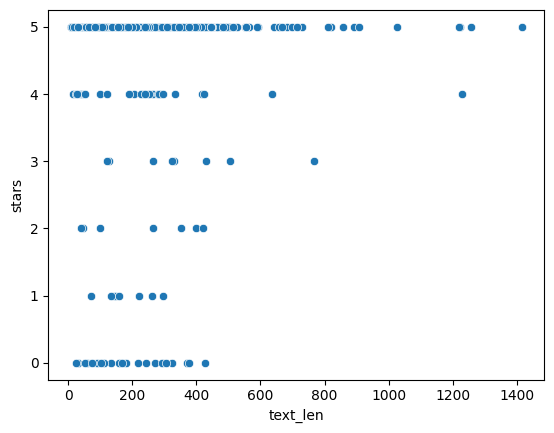

In [ ]:
sns.scatterplot(data=chosen_recipe_reviews, x='text_len', y='stars')

# Combining Users and Recipes

In [ ]:
usersPerRecipe = defaultdict(set)
recipesPerUser = defaultdict(set)
recipeIDtoName = {}
userIDtoName = {}

for index,row in recipes.iterrows():
  recipe, user, recName, username = row['recipe_code'], row['user_id'], row['recipe_name'], row['user_name']
  recipeIDtoName[recipe] = recName
  userIDtoName[user] = username
  usersPerRecipe[recipe].add(user)
  recipesPerUser[user].add(recipe)

Here we are creating a dictionary which links the users of a given recipe to to a recipe_code as well as a dictionary which links reviews to a given user. This would allow for facilitating looking at overlaps between users who share common recipes reviewed.

In [ ]:
currentRecipe = 2832
print(recipeIDtoName[currentRecipe])
usersPerRecipe[currentRecipe]

Cheeseburger Soup


{'u_14Jt3Onn7vE8',
 'u_1JqI0KynEApl',
 'u_1oKVZXzP64U03Y1r3DIJ5He5wZl',
 'u_1oKVZaxgZr9JqCUTsowfyIT48aS',
 'u_1oKVZbbOJiAxmbAxRUolzjUrKDi',
 'u_1oKVZbcNg5NYW87grfhDXNePwbL',
 'u_1oKVZdntxwYzxksw1IqW0kld9jH',
 'u_1oKVZfQBhgRUCOwfHv6F4RA51zQ',
 'u_1oKVZg1DVmIpML6RYl0Vhh6hcJm',
 'u_1oKVZibiPJd5Mv0tuRswBqWOVWD',
 'u_1oKVZj2JQOqYRqPmcdZsFtwNOrx',
 'u_1oKVZj4aBY2EoyywYL0bjfbagtL',
 'u_1oKVZjBYxHQxhJkgDmxTGIXTCIG',
 'u_1oKVZjgpdznQpEBEtXA1bOrmzL0',
 'u_1oKVZmYPulmUFbvGiBA8U3uRR6D',
 'u_1oKVZoIOMWJ2j7TA7py2BIbf1mm',
 'u_1oKVZoZ2m9nE7bLNmSXNw4MdYcU',
 'u_1oKVZpdzBp5PQHOM4PGQOZo1ujc',
 'u_1oKVZskcWCF2NqqbEvMCAEXAZIG',
 'u_1oKVZtSdpfy5KrVbAXHeHU0QI4v',
 'u_1oKVZuqBVMf8IBAX9Lp2wMHJFOL',
 'u_1oKVZvcir01Ja6U1XIczcrh8mbP',
 'u_1oKVZw7mrwjQMxXSztLnhcVRC0b',
 'u_1oKVZxAOR5BEzyF4H6ENc7jwfUW',
 'u_1oKVZxNyweYeP3lQTMS89TQLWg3',
 'u_1oKVZzipo1u8lcqQzDUcw4UBn9e',
 'u_1oKVa1vU0P0wtIMwn8FBys0ptHj',
 'u_1oKVa2nlJX0DjsXaTen7cSJO3RY',
 'u_1oKVa3dm9k4sQJZuEACIlelurOi',
 'u_1oKVa4NSseUH7Ypn2zzEhhCFguB',
 'u_1oKVa5

Looking at recipe_code 2832 (Cheeseburger Soup) we can see that there a significant number of users who have left reviews on this particular recipe. We can then select from this list of users to see if there are further overlaps within their reviews.

In [ ]:
currentUser1 = 'u_1oKVZoIOMWJ2j7TA7py2BIbf1mm'
print(userIDtoName[currentUser1])
recipesPerUser[currentUser1]

mjlouk


{414,
 957,
 2832,
 3143,
 4444,
 6504,
 7708,
 9735,
 14299,
 15805,
 16579,
 17826,
 18341,
 18345,
 19201,
 27434,
 32264,
 38183,
 39545,
 42083,
 42386,
 100276,
 191775}

In [ ]:
currentUser2 = 'u_1oKVa6DRYXqOVPHLzyZwE55UjOh'
print(userIDtoName[currentUser2])
recipesPerUser[currentUser2]

lilaccrew


{2832, 39549}

In [ ]:
recipeIDtoName[39549]

'Forgotten Jambalaya'

We can then compare mjlouk and lilaccrew and their preferences for recipes. More specifically, since both of these individuals left reviews on this cheeseburger soup recipe; we can then extend the question to whether or not each of the individual users would be interested in the other recipes which the other person left reviews on. Since lilaccrew also left a review on the Forgotten Jambalaya, there is a likelihood that mjlouk might also.